In [200]:
import chess
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import time
import torch
import torch.nn as nn

In [20]:
import os
path = 'data/Mygames/'
game_files = os.listdir(path)


In [21]:
def make_move(uci):
    '''
    returns the two postions of the uci(Universal Chess Interface) format
    '''
    pos1 = uci[:2]
    pos2 = uci[2:4]
    return (chess.parse_square(pos1), chess.parse_square(pos2))

In [35]:
board = chess.Board() 

In [38]:
board.fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

In [294]:
import os
path = 'data/Mygames/'
game_files = os.listdir(path)

def multi_games(file):
    '''
    reads a file that contains multiple games (downloaded from lichess)
    returns X, Y
    input and output positions
    '''
    moves = open(path+file, 'r').read().split('\n\n')
    del moves[::2]
    
    X = []
    Y = []
    
    for i in range(len(moves)):
        move_list = moves[i].split()
        del move_list[::3]
        if move_list[-1] in ['1-0', '0-1', '1/2-1/2']:
            del move_list[-1]
        board = chess.Board()    
        moves_uci = []
        board_pos = []
        for m in move_list:
            moves_uci.append(str(board.parse_san(m)))
            board.push_san(m)
            board_pos.append(board.fen().split('-')[0])

        board_moves = []

        for move in moves_uci:
            board_moves.append(list(make_move(move)))

        X.extend(board_pos)
        Y.extend(board_moves)
    return X,Y



In [295]:
X, Y = multi_games(game_files[0])

In [296]:
max_l = max([len(x) for x in X])

In [297]:
new_X = [list(x+' '*(max_l-len(x))) for x in X]

In [298]:
u_values = list(set(''.join(X)))

In [299]:
ascii_dict = dict()
for val in u_values:
    ascii_dict[val] = ord(val)

In [300]:
ascii_dict

{'1': 49,
 'N': 78,
 '3': 51,
 ' ': 32,
 'Q': 81,
 'r': 114,
 '2': 50,
 '6': 54,
 'n': 110,
 '8': 56,
 '/': 47,
 'p': 112,
 'q': 113,
 'P': 80,
 'K': 75,
 'B': 66,
 '0': 48,
 '5': 53,
 '9': 57,
 '4': 52,
 'w': 119,
 'f': 102,
 '7': 55,
 'd': 100,
 'b': 98,
 'k': 107,
 'R': 82}

In [301]:
ascii_X = []
for pos in new_X:
    ascii_X.append([ascii_dict[x] for x in pos])

In [302]:
ascii_X

[[114,
  110,
  98,
  113,
  107,
  98,
  110,
  114,
  47,
  112,
  112,
  112,
  112,
  112,
  112,
  112,
  112,
  47,
  56,
  47,
  56,
  47,
  51,
  80,
  52,
  47,
  56,
  47,
  80,
  80,
  80,
  49,
  80,
  80,
  80,
  80,
  47,
  82,
  78,
  66,
  81,
  75,
  66,
  78,
  82,
  32,
  98,
  32,
  75,
  81,
  107,
  113,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32],
 [114,
  110,
  98,
  113,
  107,
  98,
  110,
  114,
  47,
  112,
  112,
  49,
  112,
  112,
  112,
  112,
  112,
  47,
  50,
  112,
  53,
  47,
  56,
  47,
  51,
  80,
  52,
  47,
  56,
  47,
  80,
  80,
  80,
  49,
  80,
  80,
  80,
  80,
  47,
  82,
  78,
  66,
  81,
  75,
  66,
  78,
  82,
  32,
  119,
  32,
  75,
  81,
  107,
  113,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32],
 [114,
  110,
  98,
  113,
  107,
  98,
  110,
  114,
  47,
  112,
  112,
  49,
  112,
  112,
  112,
  112,
  112,
  47,
  50,
  112,
  53,
  47,
  5

In [309]:
Y = np.array(Y)

In [351]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(68, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 8)
        self.fc5 = nn.Linear(8, 64*2)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x



In [352]:
import torch.optim as optim


In [382]:
model = MyModel()
batch_size = 1800
n_epochs = 1000

In [383]:
model.cuda()
pass

In [384]:
lossi = []

In [385]:
from tqdm import tqdm

In [389]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-1)

# Define the number of training steps
num_steps = 10

for epoch in tqdm(range(n_epochs)):
    # Iterate over the number of training steps
    for step in range(num_steps):
        # Get the inputs and labels
        inputs, labels = ascii_X[num_steps*batch_size:(num_steps+1)*batch_size], Y[num_steps*batch_size:(num_steps+1)*batch_size]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(torch.Tensor(inputs).cuda())
        softie = nn.Softmax(1)
        # Compute the loss
        loss = criterion(outputs[: ,:64], torch.nn.functional.one_hot(torch.Tensor(labels[: , 0]).to(torch.int64), 64).float().cuda()) + criterion(outputs[: ,64:], torch.nn.functional.one_hot(torch.Tensor(labels[: , 1]).to(torch.int64), 64).float().cuda())

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()

        # Print the loss every 100 steps

#     print("Step: {} Loss: {}".format(step, loss.item()))
    lossi.append(loss.item())

100%|██████████| 1000/1000 [00:27<00:00, 36.73it/s]


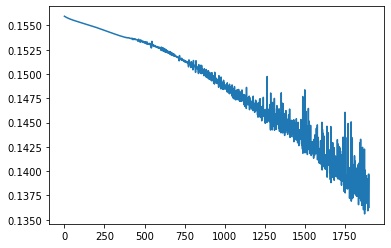

In [390]:
plt.plot(lossi[100:])


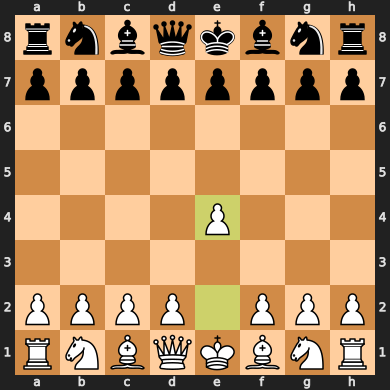

In [452]:
board = chess.Board()    
moves = [make_move('e2e4')]
board.push_uci('e2e4')
board

In [454]:
while True:
#     input()
    time.sleep(0.5)
    display.clear_output(wait=True)
    #predict next move
    fen = board.fen().split('-')[0]
    fen = fen+' '*(68-len(fen))
    inp = torch.Tensor([[ascii_dict[x] for x in fen]])
    out =  model(inp)[0]
    pos1 = out[:64].argsort()
    pos2 = out[64:].argsort()
#     model_moves = pos1, pos2
    
    
    
    #adding noise to avoid repetition
#     model_moves[0] += np.random.normal(0,0.005,size=model_moves[0].shape)
#     model_moves[1] += np.random.normal(0,0.005,size=model_moves[1].shape)
    
    
    #store each possible move and its probability(prob of pos1 + prob of pos2)
    move_prob = []
    move_list = []
    for i in range(len(pos1)):
        for j in range(len(pos2)):
            move_prob.append(out[:64][pos1[i]].detach().numpy() + out[64:][pos2[j]].detach().numpy())
            m = str(chess.square_name(pos1[i])) + str(chess.square_name(pos2[j]))
            if pos1[i] == pos2[j]:
                move_list.append('0000')
            else:
                move_list.append(m)
    
#     move_list = []
#     for p1, p2 in zip(pos1, pos2):
#         m = str(chess.square_name(p1)) + str(chess.square_name(p2))
#         if p1 == p2:
#             continue
#         move_list.append(m)
    
    
    
    #sorting the moves w.r.t their prob
    move_prob = np.array(move_prob)
    move_list = np.array(move_list)

    sorted_move_list = move_list[move_prob.argsort()][::-1]

    move_prob.sort()
    move_prob = move_prob[::-1]
    
    # board.push_san(my_move)

    i = 0
    this_move = chess.Move.from_uci(sorted_move_list[i])
    while not board.is_legal(this_move):
        i += 1
        if i == 4096:
            break
        #for promotion
        if (sorted_move_list[i][-1] == '8'or sorted_move_list[i][-1] == '1') and str(board.piece_at(chess.parse_square(sorted_move_list[i][:2]))) in 'Pp':
            this_move = chess.Move.from_uci(sorted_move_list[i]+'q')
        else:
            this_move = chess.Move.from_uci(sorted_move_list[i])
    if i == 4096:
        break
    print(sorted_move_list[i][-1])
    board.push(this_move)
    
    moves.append(make_move(sorted_move_list[i]))
    
    print(sorted_move_list[i], move_prob[i])
    display.display(board)

KeyboardInterrupt: 